# <span style="color: Steelblue"> Dinosaurs! </span>
## <span style="color: Steelblue"> Exploration of a paleontological dataset using Python </span>

>Jupyter Notebook: **'Dinos!'**

>**Goal:** Exploration of a biological data set using Python, with special emphasis on understanding data structures such as JSON and XML

>By: H.J. Megens

>Where you can reach me: hendrik-jan.megens -at- wur.nl

>Last modified: 26 September 2017

![Dino_banner](Dinos_banner.png)

There is no doubt that the coolest creatures ever to roam the earth were the
Dinosaurs. Period. End of discussion. Right?

The data from [PaleoDB](https://paleobiodb.org) was chosen for two reasons in this course. First, it is a nice
example of biological data outside of the normal scope of ‘bioinformatics’. That
might sound surprising – aren’t we trying to convert you all to bioinformaticians?
Not quite. As we’ve mentioned before, biological sciences in general are becoming
ever more data rich, which offers new analytical strategies that may be important
for life scientist to master. We hope to prepare you for the ‘data analytics’ era.
One reason for datasets increasing in size is that more and more data is becoming
aggregated in (dedicated) databases, such as PaleoDB. The advantage is obvious:
if every paleontologist would put collection data into a global database, you can
simply search online where important collections of your favorite Dino exist, so
that you can pay them a visit for further study. Any biologist who has spent a
reasonable length of time going through drawers and kabinets of collected
material in a natural history museum will concur.

In addition, the fact that data gets aggregated creates ‘global’ and
‘comprehensive’ datasets that can reveal patterns that ‘local’ or ‘fragmented’
data simply cannot. A very simple example is patterns in occurrence of taxonomic
groups. Does genus or family X occur only in Eurasia? Or also in North America,
and maybe even in Australia? Even in the $19^{th}$ century, the accumulation of
knowledge on where groups of plants and animals lived gave rise to new
biogeographic theories, and has led in the $20^{th}$ century not only to support
continental drift from theory to fact, but also has helped piece together the
course, the merging, and the splitting of continents for the past half billion years.

The second reason for considering the data from PaleoDB is far less prosaic. It is
structured in so-called JSON format, which is what we happen to consider for
today. True, you can also download the data in Tab-delimited format, but hey!,
where is the fun in that! And, as we will see at the end of this task, JSON has it’s
advantages (but also disadvantages).

JSON is a very widely used format for data that has many different ‘layers’, and
serves a purpose similar to XML. One advantage of working with JSON in Python or
other general programming languages, is that JSON in fact has a structure that
very much resembles the standard datatypes in Python, notably Dictionaries and
Lists. In fact, in a JSON file you’ll only need these:
`{:}[,]*`, the stuff that lists and dicts are made of!


Before we start coding, open the `Dinos_reduced.json` file in `gedit`. ‘Reduced’
means not all PaleoDB datafields are present, to make the file-size a bit more
manageable. <a href=https://paleobiodb.org/data1.2/occs/list#response>Information on the data fields can be found here</a>:

**a)** define records, and list tags. If you had to translate, which would you say are
dicts, which are lists? Actually, there is only ONE list in the entire file. Locate it.

In [ ]:
# there is only one list with the key "records" in its nesting dictionary

From here one, you will work with the provided Python notebook. Cell `#1` imports some of the modules. Cell `#2` defines a few subroutines to help you print correct KML files - files that will actually work in Google maps! Cell `#3` defines a subroutine to plot a histogram of the ages of dinosaur finds for your favorite dino, as well as write that plot to a JPEG file.

In [1]:
# Cell #1
# Jupyter Notebook 'Dinos!'

# import some of the stuff we need...
import json # library to convert from json to a dictionary/list complex data structure
import matplotlib.pyplot as plt # we'll plot a histogram at the end of the script. 
%matplotlib inline

In [17]:
# Cell #2
# This stuff you'll need to write the KML file
# Note how the filehandle is EXPLICITLY passed on to the function!
# Not strictly necessary, but hey, at least now you know it's needed, 
# and where to stick it!

# Write required first line
def write_kml_start(kmlfh):
    # mandatory start of KML
    kmlfh.write('<?xml version="1.0" encoding="UTF-8"?>\n')
    kmlfh.write('<kml xmlns="http://www.opengis.net/kml/2.2">\n')
    kmlfh.write('<Document>\n')
    
# Write the required last lines of the KML, and close filehandle
def write_kml_end(kmlfh):
    # mandatory end of KML
    kmlfh.write('</Document>\n</kml>')

# This little subroutine writes one 'placemark' in a KML file 
def write_placemark_in_kml(kmlfh, dinoname,counter,species,age,latitude, longitude):
    # written for each placemark; Point data added dynamically.
    kmlfh.write('  <Placemark>\n')
    kmlfh.write('    <name>%s</name>\n' % (dinoname+'_'+str(counter)))
    kmlfh.write('    <description>%s</description>\n' % (species+', '+str(age)+' MA'))
    kmlfh.write('    <Point>\n')
    kmlfh.write('       <coordinates>%s,%s</coordinates>\n' % (str(longitude),str(latitude)))
    kmlfh.write('    </Point>\n')
    kmlfh.write('  </Placemark>')

In [3]:
# Cell #3
# This subroutine can plot a histogram of all ages found for your favorite Dino
# We will use the 'hist' function of matplotlib.pyplot, you can provide additional
# parameters, such as number of bins, and the range. Dinos ruled from end of Triassic
# to end of Cretaceous, so between 65 and 220 MA should be reasonable. 

def plot_age_histogram(list_of_ages,favoritedino,numbins=100,youngest=65,oldest=220,histcolor='green'):
    # set up the plot
    plt.figure(figsize = (4,3))
    
    # plot histogram elements
    plt.hist(list_of_ages,bins=numbins,range=(youngest,oldest),color=histcolor)
    
    # add a title
    plt.title(favoritedino)
    
    # plot x and y axis labels
    plt.xlabel("Age, millions of years")
    plt.ylabel("Number of finds")
    
    # some customization
    plt.tight_layout() # supply as default - will prevent axis labels to fall off

    # We also want something more durable than a print on screen: print to jpg!
    plt.savefig(favoritedino+'.jpg',dpi=300) 

    # This you will always need to plot to screen
    plt.show()

Choose your favorite dinosaur. For this to look nice best is to choose a genus for which many records exist. And of course, it has to be a COOL genus too. Well... all dinos are cool really, even the modern ones (and taste good too; chicken anyone?)

Good choices are, for instance, *Camarasaurus*, *Iguanodon*, *Allosaurus*, *Tyrannosaurus*, *Triceratops*, and *Troodon*.

Fun fact: Naturalis in Leiden has a *Camarasaurus* on display; and of course now also has a Tyrannosaurus. When the museum opens again in 2018, they will also have a herd of five *Triceratops* in the new Dino hall!


In [ ]:
# my favorite dinosaur is Stegosaurus

In [4]:
# Cell #4
# Choose your favorite dinosaur. 
# myfavoritedino = 'Tyrannosaurus'
# myfavoritedino = 'Triceratops'
# myfavoritedino = 'Allosaurus'
# myfavoritedino = 'Iguanodon'
# myfavoritedino = 'Troodon'
myfavoritedino = 'Stegosaurus'

**b)** In Cell `#5` (below) there is a bit of code to create a complex data
structure (lists in dicts etc), called din_dict. Describe what that code does. Which
module is used for creating that object, and which method?

In [5]:
# Cell #5
# What does this do? See question b)
# define the input file name
filename = 'Dinos_reduced.json'
# What does this do? See question b)
# open the Dinos_reduced.json file
fh = open(filename,'r')
# What does this do? See question b)
# read the concent of the json file into one line string
din_json = fh.read()
# What does this do? See question b)
# clost the input file
fh.close()
# What does this do? See question b)
# use the json module to read the whole string and creat a nesting dictionary
din_dict = json.loads(din_json)

**c)** Which type is din_dict? How many elements does that object contain? (cells
`#6` and `#7` in your notebook).

In [10]:
# Cell #6
# Ok, lets first see what din_dict is. Use 'type' for that!

# ADD LINE OF CODE HERE See question c)
print type(din_dict)

<type 'dict'>


In [11]:
# Cell #7
# How many keys does it contain? Find out with the 'len' function.

# ADD LINE OF CODE HERE See question c)
print len(din_dict)

13


**d)** Which keys does din_dict contain (see cell `#8`)?

In [12]:
# Cell #8
# ... and which keys are there? If it is a dictionary, you can show the keys
# by applying the 'keys' method of the dictionary, e.g. mydict.keys()

# ADD LINE OF CODE HERE See question d)
print din_dict.keys()

[u'elapsed_time', u'data_url', u'data_source', u'parameters', u'title', u'access_time', u'records_returned', u'records_found', u'data_license', u'documentation_url', u'license_url', u'records', u'data_provider']


**e)** One of the key values of din_dict contains a list. See also your answer to a).
Which key value is that? You can retrieve that list by just asking for:
```Python
‘din_dict[‘mysterykey’]
```
where `mysterykey` is the key value we’re asking for.
Confirm that indeed the value belonging to that key is a list (use ‘`type()`’ for that).
How many elements does this list contain? Does that match with the information
the first lines of the JSON file describes? (see cells `#9` and `#10`).

In [13]:
# Cell #9
# Right. So, the one we are interested in is the 'records' key
# Since there are many records, we're expecting a list. Let's see if that's correct (use 'type'):

# ADD LINE OF CODE HERE See question e)
type(din_dict['records'])

list

In [21]:
# Cell #10
# Okidoki, that makes sense. And how many records are there? Hint: use 'len'.

# ADD LINE OF CODE HERE See question e)
records = din_dict['records']
len(records)

15034

Return the first element of that list. Which taxon is this? How many fields does
this element contain? What is its type? Look up the meaning of these ‘tags’:
‘eag’,’lag’, ‘gnl’, and ‘tna’.

[List of tags](https://paleobiodb.org/data1.2/occs/list#response)

See cell `#11`.
Pointer: Remember, the first item of a list can be retrieved as `mylist[0]`. Note that
you can also do it like this: 
```Python
din_dict[‘mysterykey’][0]
```
because what `din_dict[‘mysterykey’]` returns should be a list!

In [15]:
# Cell #11
# Let's take the first element of that list, and see what it contains.
# For more information on the tag names in the JSON:
#     https://paleobiodb.org/data1.2/occs/list#response
# The keys we will be particularly interested in:
#   'eag', for maximum age of the find
#   'lag': The late bound of the geologic time range associated with this occurrence (in Ma)
#   'gnl': The name of the genus in which this occurrence is classified. 
#   'tna': The value of this field will be the accepted taxonomic name corresponding to the identified name. 
#   'lat': latitude
#   'lng': longitude
# ADD LINE OF CODE HERE See question f)
records[0]

{u'cid': u'col:10755',
 u'eag': 150.8,
 u'gnl': u'Chaoyangsaurus',
 u'idn': u'n. gen. Chaoyangosaurus n. sp. liaosiensis',
 u'iid': u'txn:65704',
 u'lag': 132.9,
 u'lat': 42.9333,
 u'lng': 123.966698,
 u'oei': u'Late Tithonian',
 u'oid': u'occ:130209',
 u'oli': u'Valanginian',
 u'rid': u'ref:13360',
 u'rnk': 3,
 u'tdf': u'replaced by',
 u'tid': u'txn:55580',
 u'tna': u'Chaoyangsaurus youngi'}

**g)** Now look at cell `#12`. The single line of code in that cell opens a filehandle, or, more accurately, a fileobject, to a KML file, where some information and locations of the finds of your favorite dinosaur will be written. 

Add one more line of code that writes the required first lines of the KML. Use one of the subroutines given in the notebook. (Normally not strictly required, but the way this function was written: don’t forget to pass on the filehandle (called `kmlfh`)! The filehandle is an object like any other variable, and can, a.o., be passed to functions.

In [31]:
# Cell #12
# What we want to do, is to extract the locations where the fossils were found
# and to write some relevant information, primarily lat/longs but also species
# age of the site, and perhaps other things, to a KML 
# The KML can later be uploaded to either Google Maps or Google Earth

# First let's open a file where we can write the KML formatted data.
# Let's name it after your favorite dino.
kmlfh = open(myfavoritedino+'.kml','w')

# Write a single line of code that writes the required first line
# of a KML to your KML file. Don't forget to pass in the 
# filehandle/fileobject! *

# ADD LINE OF CODE HERE See question g)
write_kml_start(kmlfh)


**h)** Have a look at cell `#13`. We are defining two variables we need later on: a
‘counter’, to generate unique numbers for each time you encounter one of your
favorite dinosaurs in the JSON database. The second is an empty list that will
contain the ages of the dinosaurs. We need a list of ages to make a histogram of
the ages of the dinosaur finds. Ok, got that? Then no further action required,
go on to the next question!

In [29]:
# Cell #13
# First things first; we need a counter to provide a unique index value for each KML placemark
# And we want to plot all the ages of fossils of your favorite dino, which we will keep in a list
counter = 0
list_of_ages = list()

**i)** This one is one of the most important tasks in this exercise, at least in getting
to run the code alright: construct a for-loop to loop through the list you’ve
encountered in e). See cell `#14`. The first part of the ‘for’ loop is already there,
and for each item of the list, a variable ‘record’ will contain the value.

**j)** Proceed in cell `#14`. Complete the next 4 lines of code that capture age,
latitude, longitude, and species name data. Each time, use the correct version of:
```Python
mydata = record[‘mysterykey’]
```

**k)** Then, again in cell `#14`, add the age to the list ‘list_of_ages’ (see also question
h and cell `#13`).

**l)** Almost done in cell `#14`. Within the loop (and inside the if), the last thing that
now needs to be done is writing some information to a ‘placemark’ in a KML file.

Use one of the functions given in the notebook. Have a good look at that function
regarding the variables that need to be passed in. Important: the order matters!
And don’t forget to pass in the filehandle/fileobject again.

In [30]:
# Cell #14
# Ok... so din_dict['records'] is a list. We can loop through it.
# For more information on the tag names in the JSON:
#     https://paleobiodb.org/data1.2/occs/list#response
# Careful: the Dinos_reduced.json file does NOT have all fields
# If you want to explore all datapoints, you can download the complete Dinosaur dataset.

for record in records:
    # We want to make sure genus name is a valid field in the JSON file
    # before we check whether this record pertains our favorite dinosaur
    # Without this additional check we risk a "KeyError: 'gnl'"
    # The reason is that not all records do have genus information!

    if 'gnl' in record.keys() and myfavoritedino == record['gnl']:
        
        # (max) age of fossil
        age_max = record['eag']
        
        # latitude 
        latitude = record['lat']

        # longitude 
        longitude = record['lng']

        # species name
        species_name = record['tna']
            
        # in this list we keep all the ages of finds of your favorite dinosaur.
        # We append it with the age.
        
        # ADD LINE OF CODE HERE See question k)
        list_of_ages.append(age_max)
        
        # * something here to grow the list of ages of your favorite dinosaur *    
        # the counter keeps track of the number of finds of your favorite dinosaur
        # This is necessary because the placemarks in the KML need to have a uniqe id!
        counter +=1
            
        # Use simple subroutine to write the placemarks. The advantage of placing 
        # this in a subroutine is that the loop becomes less cluttered, and, in
        # principle, easier to read.
        
        # ADD LINE OF CODE HERE See question l)
        write_placemark_in_kml(kmlfh, myfavoritedino, counter, species_name, age_max, latitude, longitude)
        
        # hint: write_placemark(# fill in bunch of variables to pass into this function)

**m)** Ok, if you’re here, you’ve made it throught the loop (pun intended), go to cell
`#15`. Once you’re finished looping through the JSON records, no more new
placemarks will be written in the KML file, so you can close that now. But before
you close that filehandle, you’ll need to write some famous last words! (Well,
sorry, no, but a KML, like any XML, will need to have proper closing tags). Use one
of the functions given in the notebook to do that. You know the drill by now: don’t
forget to pass on the filehandle!

In [33]:
# Cell #15
# Write the required last lines of the KML

# ADD LINE OF CODE HERE See question m). 
write_kml_end(kmlfh)
# and close filehandle
kmlfh.close()

ValueError: I/O operation on closed file

**n)** Almost there! (Cell `#16`). Plot the histogram. Use one of the functions given in
the notebook. Only two parameters are really required because they have no default values. Only pass those two in, and note that order matters! Do you get a histogram? You can save it using the ‘diskette’ symbol in the plotting window. Not the neatest histogram in the world maybe; there are plenty of options to make it prettier (if you want you can try to change number of bins, color, other options are a bit harder; if you’re really interested you can have a look at the matplotlib documentation.). 

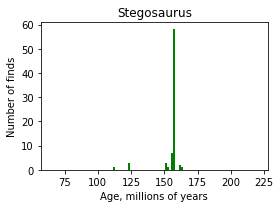

In [35]:
# Cell #16
# plot the histogram. Pass on list_of_age and myfavoritedinosaur to the 
# function, in the correct order.

# ADD LINE OF CODE HERE See question n)
plot_age_histogram(list_of_ages,myfavoritedino,numbins=100,youngest=65,oldest=220,histcolor='green')

**o)** Ok, that was nearly it for the mandatory stuff. ... hey, we made that KML remember? Open it first in a text file editor (nano, gedit, or something similar) and investigate its contents.

Curious how that looks like in Google earth or Google maps? Unfortunately we don’t have Google Earth installed on the virtual machine, but you can go to Google maps, from the ‘menu’ go to ‘my places’, then go to ‘maps’, and from there to ‘make map’. You should then be presented with an option to ‘import’.

From there you should be able to drag the KML to the indicated place in Google Maps. Looks nice? If you’re transferring the KML file to a computer with Google Earth installed, it may even just open in Google Earth by double-clicking the KML file.

**p)** We were considering a ‘reduced’ dataset that only has a limited number of
fields in the data. If we would get a dataset that has all available fields, in JSON,
could we simply run it through the same script? What might happen if we did that
with a TAB-delimited file?

**q)** From the Notebook, in stead of the ‘Dinos_reduced’, use the ‘Dinosaurs.json’ file. How many fields are there now per record?

In [ ]:
# Cell #17
# Run the 'Dinosaurs.json' file, either from a script you've made or from the notebook.
# Look at what additional fields are included. How many more?
# there are more records, and also more fields in each records.

# Does the 'Dinosaurs.json file keep all the fields in the same order as
# the 'Dinos_reduced' file? Why does it still run? Could you expect the same if you
# had two TAB delimited files that had different numbers of fields?


**r)** *Optional:* Transfer all the important stuff from your notebook to an empty script file you could call `Dinos.py`. Include the code from the last cell (cell `#18`) to allow you to pass in options to your script.

In [ ]:
# Cell #18
# Does it work? Great!
# Now transfer the code to a python script (i.e. text file)
# include option parsing to allow passing in variables for the JSON file,
# and your favorite dinosaur genus.
# set arguments by the code below:
# Note: this does not work in a Jupyter Notebook, that's why you need to transfer to file.
# See question q)

import argparse
parser = argparse.ArgumentParser(description='Simple analysis of PaleoDB and JSON formats')
parser.add_argument("-f", "--filename", help="PaleoDB file in JSON", type = str, required = True)
parser.add_argument("-d", "--dino", help="favorite dinosaur genus - case sensitive!", type = str, required = True)

args = parser.parse_args()

filename = args.filename
myfavoritedino = args.dino

**s)** *Optional:* Organize the contents of cells `#12` through `#16` into a function that writes a KML and plots an age distribution histogram for a dinosaur. Make sure the function takes a dinosaur
name as argument.

Make a list of all the dinosaurs in cell `#4`, loop through the list while calling the
function you just made, this way automating the whole process. 

Your choice: do this either in notebook or script.

In [ ]:
# Cell #19
# Optional.
# Organize the contents of cells #12 through 16 into a function that writes a KML and plots
# an age distribution histogram for a dinosaur. Make sure the function takes a dinosaur
# name as argument.
# Make a list of all the dinosaurs in cell #4, loop through the list while calling the
# function you just made, this way automating the whole process. 
# Your choice: do this either in notebook or script.

**t) MANDATORY:** identify these dinosaurs.
![Dinos](Dinos.png)
